<a href="https://colab.research.google.com/github/AdityaVerma2809/Machine-Learning/blob/main/Sentiment_Analysis_Using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

In [3]:
TOP_WORDS = 5000
MAX_REVIEW_LENGTH = 500
BATCH_SIZE = 64
EPOCHS = 5

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=TOP_WORDS)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(f"Train sequences: {len(X_train)}")
print(f"Test sequences: {len(X_test)}")
print(f"Max word index in training data: {max(max(X_train, key=max))}")

Train sequences: 25000
Test sequences: 25000
Max word index in training data: 4999


In [6]:
print("Padding sequences...")
X_train = sequence.pad_sequences(X_train, maxlen=MAX_REVIEW_LENGTH)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_REVIEW_LENGTH)

print(f"X_train shape after padding: {X_train.shape}")
print(f"X_test shape after padding: {X_test.shape}")

Padding sequences...
X_train shape after padding: (25000, 500)
X_test shape after padding: (25000, 500)


In [7]:
EMBEDDING_VECTOR_LENGTH = 32

model = Sequential()
model.add(Embedding(TOP_WORDS, EMBEDDING_VECTOR_LENGTH, input_length=MAX_REVIEW_LENGTH))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [8]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.6683 - loss: 0.5822 - val_accuracy: 0.8492 - val_loss: 0.3601
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.8465 - loss: 0.3615 - val_accuracy: 0.6564 - val_loss: 0.6250
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7230 - loss: 0.5484 - val_accuracy: 0.7345 - val_loss: 0.5250
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 29ms/step - accuracy: 0.8274 - loss: 0.3892 - val_accuracy: 0.8380 - val_loss: 0.3693
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8911 - loss: 0.2749 - val_accuracy: 0.8482 - val_loss: 0.3536


In [9]:
print("\n--- Final Evaluation ---")
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {scores[1]*100:.2f}%")


--- Final Evaluation ---
Test Accuracy: 84.82%


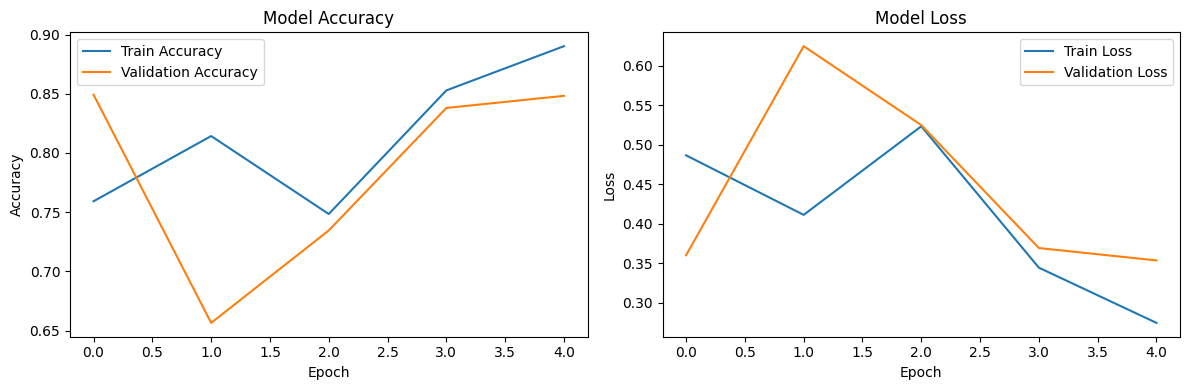

In [10]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_history(history)